In [ ]:
! pip install faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.3 MB/s eta 0:00:00


In [ ]:
import random
from faker import Faker
import tqdm
import numpy as np
import pandas as pd
import string
import time

In [ ]:
from google.colab import drive
drive = drive.mount('/content/drive')

from matplotlib import pyplot as plt
import cv2

Mounted at /content/drive


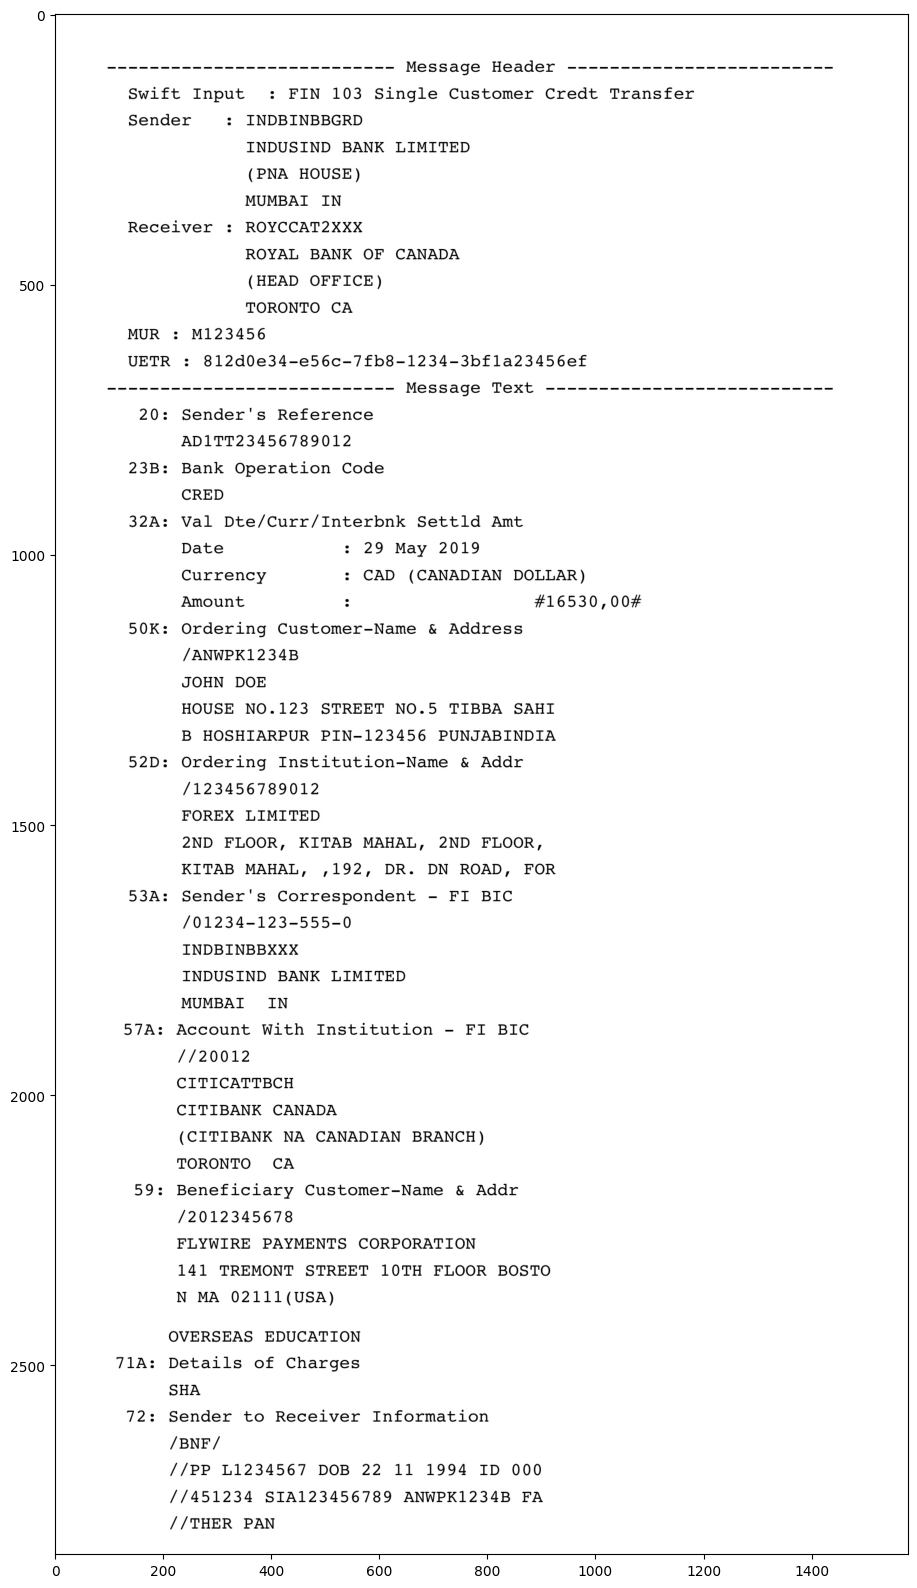

In [ ]:
img_for_plot = cv2.imread('/content/drive/MyDrive/CRP files/Sample-Swift.jpg', 1)
plt.figure(figsize=(25, 20))
plt.subplot(121)
plt.imshow(img_for_plot)

## Collating base data format

In [ ]:
# function to merge the dictionaries from each pattern to a master dictionary
def mergeDictionary(d1,d2):
  for k,v in d1.items():
    d1[k].extend(d2[k])
  return d1

In [ ]:
# function to merge all the text file to a master text file
# filenames = ['file1.txt', 'file2.txt', ...]
# output_name = "final_result"

def mergeTextfiles(filenames, output_name):
  with open(str(output_name+'.txt'), 'w') as outfile:
      for fname in filenames:
          with open(fname) as infile:
              for line in infile:
                if len(line)>0:
                  outfile.write(line)

In [ ]:
# load json module
import json

# Storing output dictionary as json and text file

def storeDictionary(input_dict, output_name):
  #Storing data dictionary as txt 
  # open file for writing
  f = open(str(output_name+'.txt'),"w")

  # write file
  f.write(str(input_dict))

  # close file
  f.close()


  # create json object from dictionary
  json_dict = json.dumps(input_dict)

  # open file for writing, "w" 
  f = open(str(output_name+'.json'),"w")

  # write json object to file
  f.write(json_dict)

  # close file
  f.close()


## Basic list of EU sanctioned country in financial sanctions and embargo

Using the link:

https://www.sanctionsmap.eu/#/main

In [ ]:
snctn_cntry = ['Afghanistan' ,	'Belarus' ,	'Bosnia & Herzegovina' ,	'Burundi' ,	'Central African Republic' ,
               'Chemical weapons' ,	'China' ,	'Democratic Peoples Republic of Korea (DPRK – North Korea)' ,	'Democratic Republic of the Congo' ,
               'Guinea' ,	'Guinea-Bissau' ,	'Haiti' ,	'Iran' ,	'Iraq' ,	'Lebanon' ,	'Libya' ,	'Mali' ,	'Moldova' ,	'Montenegro' ,
               'Myanmar (Burma)' ,	'Nicaragua' ,	'Russia' ,	'Serbia' ,	'Somalia' ,	'South Sudan' ,	'Sudan' ,
               'Syria' ,	'Tunisia' ,	'Turkey' ,	'Ukraine' ,	'United States' ,	'Venezuela' ,	'Yemen' ,	'Zimbabwe']

In [ ]:
print(type(snctn_cntry))
print(len(snctn_cntry))


<class 'list'>
34


## Accout number Data : Shuffled

* Take correct acc pattern from iban_df
* Take shuffled acc patterns from acc_shuffled_base
* Perform append, remove duplicates
* Randomize data, take 50% sample remove spaces and keep spaces
* Subset as per Euro countries and matching data for sanctioned countries



In [ ]:
# manually download and running 
iban_df = pd.read_csv("/content/drive/Shareddrives/CRP_SG/Final_Iban.csv")
print(iban_df.shape)
iban_df.head()

(1500000, 2)


,Country,Iban
0,Lebanon,LB45 0871 0323 6563 8857 1005 4480
1,Angola,AO52 1625 9100 8524 8173 8823 5
2,Morocco,MA54 3898 6575 3897 8827 4660 4973
3,Spain,ES15 3563 6540 7512 0965 3719
4,Benin,BJ84 8580 4663 4959 4814 4696 4833


In [ ]:
iban_df[iban_df.Country == 'Iran']

,Country,Iban
106,Iran,IR09 5048 8046 6687 2892 7717 43
181,Iran,IR39 8820 5921 7034 2044 7123 44
250,Iran,IR47 4377 7043 7422 3645 0451 07
308,Iran,IR07 6747 5816 6326 0688 2360 00
618,Iran,IR57 5571 4460 5570 3991 8510 33
...,...,...
1499335,Iran,IR82 6577 1202 5226 5436 3984 70
1499470,Iran,IR91 4604 0244 3915 4269 2540 85
1499584,Iran,IR72 9137 0973 4164 4164 5501 79
1499585,Iran,IR11 9779 8765 6812 8514 3701 15


In [ ]:
# Account number  shuffled data
acc_shuffled_base = pd.read_csv('/content/drive/Shareddrives/CRP_SG/account_numbers_diffformats.csv')
acc_shuffled_base.head()

,Country,Iban
0,Spain,ES15 3563 6540 7512 0965 3719
1,Bulgaria,BG41 3371 0958 5012 7343 33
2,Lithuania,LT71 1420 9784 3018 0974
3,Netherlands,NL25 8992 7819 9326 22
4,Lithuania,LT73 6882 0213 4882 5596


In [ ]:
acc_shuffled_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   Country  1500000 non-null  object
 1   Iban     1500000 non-null  object
dtypes: object(2)
memory usage: 22.9+ MB


In [ ]:
acc_shuffled_base.Country.value_counts()

Faroe Islands    14793
Portugal         14790
Liechtenstein    14729
Greece           14697
Sudan            14670
                 ...  
Morocco          14243
Poland           14159
Belgium          14156
Nicaragua        14146
Mauritius        14096
Name: Country, Length: 104, dtype: int64

In [ ]:
acc_shuffled_base[acc_shuffled_base.Country == 'Iran']

,Country,Iban
375050,Iran,B8M0AWXVT30708Z05HIDN
375108,Iran,L8B4FKGCE28499Z12WZIX
375160,Iran,S3G6ACACG86892U33NBOL
375201,Iran,Y9Z1MYZLU94645A20SIVE
375440,Iran,J7E5KQWJA66856L24IDVY
...,...,...
1499520,Iran,P5H3-VV19-FSNQ-GEFP
1499613,Iran,O3L8-CC36-NHCP-GNVX
1499689,Iran,P9P7-UE48-VISD-SOEO
1499690,Iran,W8W8-UD97-NLMM-NZHF


In [ ]:
# Taking the count of sanctioned country data present in Actual iban df and Shuffled iban df
print('Count of sanctioned country data present in True Acc num df : {}'.format(pd.Series(iban_df.Country.unique()).isin(snctn_cntry).sum()))
print('Count of sanctioned country data present in Shuffled Acc num df : {}'.format(pd.Series(acc_shuffled_base.Country.unique()).isin(snctn_cntry).sum()))
print('Sanctioned country data present in True and Shuffled Acc num df : {}'.format(acc_shuffled_base.Country.unique()[pd.Series(acc_shuffled_base.Country.unique())\
                                                                                                                  .isin(snctn_cntry)]))


Count of sanctioned country data present in True Acc num df : 18
Count of sanctioned country data present in Shuffled Acc num df : 18
Sanctioned country data present in True and Shuffled Acc num df : ['Lebanon' 'Burundi' 'Libya' 'Moldova' 'Russia' 'Guinea-Bissau' 'Mali'
 'Nicaragua' 'Central African Republic' 'Belarus' 'Serbia' 'Iran'
 'Tunisia' 'Iraq' 'Montenegro' 'Ukraine' 'Turkey' 'Sudan']


In [ ]:
# Appending the datasets
acc_shuffled = pd.concat([iban_df, acc_shuffled_base], ignore_index = True)

# Deduping the dataset
acc_shuffled = acc_shuffled.drop_duplicates() 

# randomly select some 50% datapoints and remove spaces
acc_shuffled = acc_shuffled.sample(frac=1, random_state=42).reset_index(drop=True)

for i in range(int(acc_shuffled.shape[0]/2)):
  acc_shuffled.loc[i,'Iban'] =  ''.join(acc_shuffled.loc[i,'Iban'].split())

print(acc_shuffled.shape)
print(acc_shuffled.info())
acc_shuffled.head()


(2625029, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2625029 entries, 0 to 2625028
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   Country  object
 1   Iban     object
dtypes: object(2)
memory usage: 40.1+ MB
None


,Country,Iban
0,Finland,FI7954389100828386
1,Comoros,WDOZTQTESRTTFILDKVFUMELURY7020HWQJC
2,North Macedonia,IBOENMGCEDZTOWWIHQWWWYUMDJ7747SZYII
3,Congo,CG7344434525099971958187497
4,Dominican Republic,DO54295681410947524892651378


In [ ]:
# lower casing country column 
acc_shuffled['country_lower'] = acc_shuffled['Country'].apply(lambda x: x.lower().strip())

In [ ]:
acc_shuffled.head()

,Country,Iban,country_lower
0,Finland,FI7954389100828386,finland
1,Comoros,WDOZTQTESRTTFILDKVFUMELURY7020HWQJC,comoros
2,North Macedonia,IBOENMGCEDZTOWWIHQWWWYUMDJ7747SZYII,north macedonia
3,Congo,CG7344434525099971958187497,congo
4,Dominican Republic,DO54295681410947524892651378,dominican republic


## LOCATION and NAME Df Data

* Use data for Latin countries overlapping with Acc num shuffled df
* Think of a way to use countries with no acc num overlapping: Add random account number? like a noise?? (TBD)
* Add noise to names : Randomize Name pattern, add "noise strings" to about 30-40% entries, randomly merge some part of company names \\
Lamie's comments: (I think that this is because you have similar structure of the names in your input: “ FIRST NAME + LAST NAME”. I propose you to generate some new messages with different structure of names and addresses, for example you can generate long names (>3 , 4 or 5 words which that exist in some countries) and also try with names containing punctuations like : ‘  -  .  Therefore you will diversify the structure of names and model will have different patterns.

You can also try long addresses and short addresses..)



### Creating Normal Latin DF

In [ ]:
# load the Latin country NumPy binary file into an array
ar = np.load('/content/drive/MyDrive/CRP files/latin_countries.npy',allow_pickle=True)

# create a DataFrame from the array
latin_df = pd.DataFrame(ar, columns=['people_name', 'company_name', 'address', 'language_country'])
print(latin_df.shape)
latin_df.head()

(1000000, 4)


,people_name,company_name,address,language_country
0,Renata Vackova,Horakova s.r.o.,V Americe 255 318 42 Tovacov,Czech - Czech Republic
1,Iva Krizova,Kucerova,Budapestska 744 600 74 Dobris,Czech - Czech Republic
2,Jaroslava Kopecka,Holubova Prochazka o.s.,Cerhenicka 81 580 63 Blsany,Czech - Czech Republic
3,Miroslav Blaha,Maly,Vrsovka 27 460 54 Horni Blatna,Czech - Czech Republic
4,Blazena Markova,Ruzicka o.s.,U Balabenky 597 219 96 Kasperske Hory,Czech - Czech Republic


In [ ]:
latin_df['language'] = latin_df['language_country'].apply(lambda x : x.split('-')[0].strip().lower())
latin_df['country'] = latin_df['language_country'].apply(lambda x : x.split('-')[1].strip().lower())
latin_df.head()

,people_name,company_name,address,language_country,language,country
0,Renata Vackova,Horakova s.r.o.,V Americe 255 318 42 Tovacov,Czech - Czech Republic,czech,czech republic
1,Iva Krizova,Kucerova,Budapestska 744 600 74 Dobris,Czech - Czech Republic,czech,czech republic
2,Jaroslava Kopecka,Holubova Prochazka o.s.,Cerhenicka 81 580 63 Blsany,Czech - Czech Republic,czech,czech republic
3,Miroslav Blaha,Maly,Vrsovka 27 460 54 Horni Blatna,Czech - Czech Republic,czech,czech republic
4,Blazena Markova,Ruzicka o.s.,U Balabenky 597 219 96 Kasperske Hory,Czech - Czech Republic,czech,czech republic


In [ ]:
latin_df.language_country.value_counts()

Czech - Czech Republic     40000
Italian - Italy            40000
Swedish - Sweden           40000
Slovenian - Slovenia       40000
Romanian - Romania         40000
Portuguese - Portugal      40000
Portuguese - Brazil        40000
Polish - Poland            40000
Norwegian - Norway         40000
Dutch - Netherlands        40000
Latvian - Latvia           40000
Lithuanian - Lithuania     40000
Indonesian - Indonesia     40000
German - Germany           40000
Hungarian - Hungary        40000
Croatian - Croatia         40000
French - France            40000
Estonian - Estonia         40000
Spanish - Mexico           40000
Spanish - Spain            40000
English - United States    40000
English - Great Britain    40000
English - Canada           40000
Danish - Denmark           40000
Turkish - Turkey           40000
Name: language_country, dtype: int64

In [ ]:
len(latin_df.country.unique())

25

In [ ]:
#  Checking overlapping countries in acc_shuffled data
avail_country = acc_shuffled['country_lower'].unique()[pd.Series(acc_shuffled['country_lower'].unique()).isin(latin_df.country)]
print(avail_country.size)
avail_country

20


array(['turkey', 'netherlands', 'latvia', 'sweden', 'lithuania', 'norway',
       'france', 'germany', 'spain', 'romania', 'portugal', 'estonia',
       'poland', 'italy', 'czech republic', 'denmark', 'croatia',
       'brazil', 'hungary', 'slovenia'], dtype=object)

In [ ]:
# taking stratified samples of column "country" for latin df database

# Specify the column to use for stratification
strat_col = 'country'

# Group the data by the stratification column
grouped = latin_df.groupby(strat_col)

# Define a function to perform the stratified random sampling for each group, by country
def stratified_sample(group, n=5000):
    return group.sample(n=n, replace=False)

# Apply the function to each group to get a stratified sample
df_stratified_latin = grouped.apply(stratified_sample)
df_stratified_latin = df_stratified_latin.reset_index(drop=True)
print(df_stratified_latin.shape)
df_stratified_latin.head()

(125000, 6)


,people_name,company_name,address,language_country,language,country
0,Kevin Souza,Ribeiro - EI,Praia Farias 36 Vila Rica 64339-407 da Conceic...,Portuguese - Brazil,portuguese,brazil
1,Caroline Rezende,Farias,Nucleo de da Mota 50 Alto Vera Cruz 81270-540 ...,Portuguese - Brazil,portuguese,brazil
2,Dra. Gabrielly Silva,Monteiro,Sitio Ribeiro 9 Jatoba 22238224 Novaes das Flo...,Portuguese - Brazil,portuguese,brazil
3,Dra. Mariane Teixeira,Alves,Avenida de Almeida Canada 61421-697 Duarte Ver...,Portuguese - Brazil,portuguese,brazil
4,Srta. Marina da Luz,Costela da Costa - EI,Estacao de Novaes 82 Castelo 42471746 Fernande...,Portuguese - Brazil,portuguese,brazil


In [ ]:
# picking stratified data for only available data country
df_stratified_latin = df_stratified_latin[df_stratified_latin['country'].isin(list(avail_country))]
print(df_stratified_latin.shape)
df_stratified_latin.head()

(100000, 6)


,people_name,company_name,address,language_country,language,country
0,Kevin Souza,Ribeiro - EI,Praia Farias 36 Vila Rica 64339-407 da Conceic...,Portuguese - Brazil,portuguese,brazil
1,Caroline Rezende,Farias,Nucleo de da Mota 50 Alto Vera Cruz 81270-540 ...,Portuguese - Brazil,portuguese,brazil
2,Dra. Gabrielly Silva,Monteiro,Sitio Ribeiro 9 Jatoba 22238224 Novaes das Flo...,Portuguese - Brazil,portuguese,brazil
3,Dra. Mariane Teixeira,Alves,Avenida de Almeida Canada 61421-697 Duarte Ver...,Portuguese - Brazil,portuguese,brazil
4,Srta. Marina da Luz,Costela da Costa - EI,Estacao de Novaes 82 Castelo 42471746 Fernande...,Portuguese - Brazil,portuguese,brazil


In [ ]:
print(len(df_stratified_latin.country.unique()))
df_stratified_latin.country.unique()

20


array(['brazil', 'croatia', 'czech republic', 'denmark', 'estonia',
       'france', 'germany', 'hungary', 'italy', 'latvia', 'lithuania',
       'netherlands', 'norway', 'poland', 'portugal', 'romania',
       'slovenia', 'spain', 'sweden', 'turkey'], dtype=object)

In [ ]:
# taking stratified samples of column "country_lower" from account number data
# Specify the column to use for stratification
strat_col = 'country_lower'

# Group the data by the stratification column
grouped = acc_shuffled.groupby(strat_col)

# Define a function to perform the stratified random sampling for each group
def stratified_sample(group, n=5000):
    return group.sample(n=n, replace=False)

# Apply the function to each group to get a stratified sample
df_stratified_acc = grouped.apply(stratified_sample)
df_stratified_acc = df_stratified_acc.reset_index(drop=True)
df_stratified_acc.head()

,Country,Iban,country_lower
0,Albania,AL16936562986758782343399261,albania
1,Albania,AL73 2315 3172 4877 1103 0926 5046,albania
2,Albania,AL97 0790 1020 6616 8189 2477 3208,albania
3,Albania,1320GQH0568MF9,albania
4,Albania,7M7XUH-6755-R2LNA-8D2GCH,albania


In [ ]:
# creating a merged dataset ready for pattern shuffler
df_stratified_latin2 = pd.DataFrame()

for i in range(len(avail_country)):
  ldf = df_stratified_latin[df_stratified_latin['country'] == avail_country[i]].reset_index(drop=True)
  idf = df_stratified_acc[df_stratified_acc['country_lower'] == avail_country[i]].reset_index(drop=True)
  temp_df = pd.merge(ldf, idf, left_index = True, right_index = True)
  temp_df = temp_df.drop(labels = ['country_lower'], axis =1)
  df_stratified_latin2 = pd.concat([df_stratified_latin2, temp_df])
  
print(df_stratified_latin2.shape)
df_stratified_latin2.head()

(100000, 8)


,people_name,company_name,address,language_country,language,country,Country,Iban
0,Binay Sezer,Yorulmaz A.S.,38614 Soylu Squares West Nura VT 04021,Turkish - Turkey,turkish,turkey,Turkey,TR79 3344 9084 8096 1939 2844 86
1,Ars. Gor. Alize Kerime Safak Ihsanoglu,Inonu Inonu Ltd.,2200 Camurcuoglu Bypass Apt. 690 North Ummahan...,Turkish - Turkey,turkish,turkey,Turkey,TR77 7323 2068 9915 1651 1488 68
2,Mubetcel Yildirim,Ihsanoglu Akgunduz Tic.,7800 Zengin Prairie Suite 361 Arpagshire CA 10198,Turkish - Turkey,turkish,turkey,Turkey,W6Z2-JL47-UCWF-GWFU
3,Hadrey Cetin,Koruturk San.,3691 Alemdar Station West Zehranurberg NE 26562,Turkish - Turkey,turkish,turkey,Turkey,TR349831401609426153199697
4,Iyiyurek Aksu,TUSAS-Turk Havacilik ve Uzay,948 Duran Cape Suite 880 East Tartis KS 79180,Turkish - Turkey,turkish,turkey,Turkey,TR163747203288364719932438


In [ ]:
# Adding country name to addresses
df_stratified_latin2['address_new'] = df_stratified_latin2['address'] + ' ' + df_stratified_latin2['Country']
df_stratified_latin2.head()

,people_name,company_name,address,language_country,language,country,Country,Iban,address_new
0,Binay Sezer,Yorulmaz A.S.,38614 Soylu Squares West Nura VT 04021,Turkish - Turkey,turkish,turkey,Turkey,TR79 3344 9084 8096 1939 2844 86,38614 Soylu Squares West Nura VT 04021 Turkey
1,Ars. Gor. Alize Kerime Safak Ihsanoglu,Inonu Inonu Ltd.,2200 Camurcuoglu Bypass Apt. 690 North Ummahan...,Turkish - Turkey,turkish,turkey,Turkey,TR77 7323 2068 9915 1651 1488 68,2200 Camurcuoglu Bypass Apt. 690 North Ummahan...
2,Mubetcel Yildirim,Ihsanoglu Akgunduz Tic.,7800 Zengin Prairie Suite 361 Arpagshire CA 10198,Turkish - Turkey,turkish,turkey,Turkey,W6Z2-JL47-UCWF-GWFU,7800 Zengin Prairie Suite 361 Arpagshire CA 10...
3,Hadrey Cetin,Koruturk San.,3691 Alemdar Station West Zehranurberg NE 26562,Turkish - Turkey,turkish,turkey,Turkey,TR349831401609426153199697,3691 Alemdar Station West Zehranurberg NE 2656...
4,Iyiyurek Aksu,TUSAS-Turk Havacilik ve Uzay,948 Duran Cape Suite 880 East Tartis KS 79180,Turkish - Turkey,turkish,turkey,Turkey,TR163747203288364719932438,948 Duran Cape Suite 880 East Tartis KS 79180 ...


In [ ]:
# keeping relevant columns from df_stratified_latin2
df_stratified_latin3 = df_stratified_latin2.drop(columns=['address','language_country','language', 'country', 'Country'])

# specify the new column names as a dictionary
new_col_names = {'people_name': 'Name_people', 'company_name': 'Name_company','address_new' : 'Address', 'Iban' : 'IBAN'}

df_stratified_latin3 = df_stratified_latin3.rename(columns=new_col_names)

print(df_stratified_latin3.shape)
df_stratified_latin3.head()

(100000, 4)


,Name_people,Name_company,IBAN,Address
0,Binay Sezer,Yorulmaz A.S.,TR79 3344 9084 8096 1939 2844 86,38614 Soylu Squares West Nura VT 04021 Turkey
1,Ars. Gor. Alize Kerime Safak Ihsanoglu,Inonu Inonu Ltd.,TR77 7323 2068 9915 1651 1488 68,2200 Camurcuoglu Bypass Apt. 690 North Ummahan...
2,Mubetcel Yildirim,Ihsanoglu Akgunduz Tic.,W6Z2-JL47-UCWF-GWFU,7800 Zengin Prairie Suite 361 Arpagshire CA 10...
3,Hadrey Cetin,Koruturk San.,TR349831401609426153199697,3691 Alemdar Station West Zehranurberg NE 2656...
4,Iyiyurek Aksu,TUSAS-Turk Havacilik ve Uzay,TR163747203288364719932438,948 Duran Cape Suite 880 East Tartis KS 79180 ...


### Adding data for Sensitive countries

Already added EU + normal countries: \\
'brazil', 'croatia', 'czech republic', 'denmark', 'estonia',
       'france', 'germany', 'hungary', 'italy', 'latvia', 'lithuania',
       'netherlands', 'norway', 'poland', 'portugal', 'romania',
       'slovenia', 'spain', 'sweden', 'turkey'

In [ ]:
cntry_added = df_stratified_latin2.country.unique()
print(cntry_added)

['turkey' 'netherlands' 'latvia' 'sweden' 'lithuania' 'norway' 'france'
 'germany' 'spain' 'romania' 'portugal' 'estonia' 'poland' 'italy'
 'czech republic' 'denmark' 'croatia' 'brazil' 'hungary' 'slovenia']


In [ ]:
print('Sanctioned country data present in True and Shuffled Acc num df : {}'.format(acc_shuffled.Country.unique()[pd.Series(acc_shuffled.Country.unique())\
                                                                                                                  .isin(snctn_cntry)]))

Sanctioned country data present in True and Shuffled Acc num df : []


In [ ]:
#  Checking overlapping countries in Latin df for Sanctioned country data
snctn_cntry = list(map(str.lower, snctn_cntry))
# print("Sanction countries:", snctn_cntry)

avail_country2 = latin_df['country'].unique()[pd.Series(latin_df['country'].unique()).isin(snctn_cntry)]
print("Available overlap in Latin DF:", avail_country2.size)
avail_country2

Available overlap in Latin DF: 2


array(['united states', 'turkey'], dtype=object)

In [ ]:
# finding a list of sensitive countries data to be added
acc_cntry = pd.Series(acc_shuffled.country_lower.unique()[pd.Series(acc_shuffled.country_lower.unique()).isin(snctn_cntry)]).apply(lambda x : x.lower())
cntry_to_add = acc_cntry[~acc_cntry.isin(cntry_added)]
print("Available overlap in Acc number df: ", len(cntry_to_add))
print(cntry_to_add)

Available overlap in Acc number df:  17
0                      tunisia
2                      lebanon
3                         mali
4     central african republic
5                      belarus
6                   montenegro
7                         iran
8                guinea-bissau
9                      moldova
10                      russia
11                      serbia
12                     burundi
13                       sudan
14                        iraq
15                     ukraine
16                       libya
17                   nicaragua
dtype: object


In [ ]:
# subsetting datasets for acc num 
acc_sensitive = acc_shuffled[acc_shuffled.country_lower.isin(cntry_to_add)].reset_index(drop = True)
print(acc_sensitive.shape)
acc_sensitive.head()

(490326, 3)


,Country,Iban,country_lower
0,Tunisia,HATG3941SSXU-BWFI,tunisia
1,Tunisia,5307FNA8754QW7,tunisia
2,Lebanon,LB78204142600085466803000188,lebanon
3,Mali,ML75069985586668182152885839,mali
4,Central African Republic,3284-PIJD-ZDBZ-5194,central african republic


In [ ]:
# loading wiki data basic info
import ast
filename = '/content/drive/Shareddrives/CRP_SG/Wikidata_dict.txt'
with open(filename, "r") as f:
    wiki_dictionary = ast.literal_eval(f.read())

In [ ]:
wiki_dictionary.keys()

dict_keys(['Name_people', 'Address', 'Name_company'])

In [ ]:
print(len(wiki_dictionary["Name_people"]))
print(len(wiki_dictionary["Address"]))
print(len(wiki_dictionary["Name_company"]))

164892
1045
4190


In [ ]:
wiki_dictionary["Name_people"]

In [ ]:
print(len(wiki_dictionary["Name_people"][:1045]))
print(len(wiki_dictionary["Address"][:1045]))
print(len(wiki_dictionary["Name_company"][:1045]))

1045
1045
1045


In [ ]:
# Picking first 1045 only as not equal datasets
d = {'Name_people': wiki_dictionary["Name_people"][:1045], 'Name_company' : wiki_dictionary["Name_company"][:1045],'Address': wiki_dictionary["Address"][:1045]}
wiki_df = pd.DataFrame(d)
wiki_df.head()

,Name_people,Name_company,Address
0,Volodymyr Hustov,Novokramatorsky Mashinostroitelny Zavod,"Vulytsya Bohdana Khmelʹnytsʹkoho, 1, Khotiv, K..."
1,Myroslav Skoryk,Dniproenergo,"Ivan Franko Street 34/33, 3rd floor, 01901 Kyiv"
2,Marta Litinskaya-Shul,SCM Holdings,"4 Muzeiny Lane, 01901, Kyiv"
3,Nina Zyuskova,Ukrgrafit,"Vulytsya Akademika Tronʹka, Kyiv"
4,Olena Sadovnycha,Rosava,"Vul. Velyka Vasyl’kivs’ka 55, Kyiv, Ukraine, 0..."


In [ ]:
wiki_df
# checked mostly countries consist of Ukraine, Russia , Taiwan, hongkong

,Name_people,Name_company,Address
0,Volodymyr Hustov,Novokramatorsky Mashinostroitelny Zavod,"Vulytsya Bohdana Khmelʹnytsʹkoho, 1, Khotiv, K..."
1,Myroslav Skoryk,Dniproenergo,"Ivan Franko Street 34/33, 3rd floor, 01901 Kyiv"
2,Marta Litinskaya-Shul,SCM Holdings,"4 Muzeiny Lane, 01901, Kyiv"
3,Nina Zyuskova,Ukrgrafit,"Vulytsya Akademika Tronʹka, Kyiv"
4,Olena Sadovnycha,Rosava,"Vul. Velyka Vasyl’kivs’ka 55, Kyiv, Ukraine, 0..."
...,...,...,...
1040,Oleksandr Koval,Rive Gauche,"House #36, Street 13, Lane 1 on the left"
1041,Andriy Koval,Rigla,"St. No. 10, House No. 337, Wazir Akbar Khan"
1042,Volodymyr Braila,"Rolma factory, Rostov Veliky","Malalai Watt, Shah-re-Naw, Ministry of Interio..."
1043,Mihajlo Ûlìanovič Brajčevs'kij,Rosvodokanal,"District 10, Wazir Akbar Khan, str.15"


In [ ]:
cntry_to_add.values

array(['tunisia', 'lebanon', 'mali', 'central african republic',
       'belarus', 'montenegro', 'iran', 'guinea-bissau', 'moldova',
       'russia', 'serbia', 'burundi', 'sudan', 'iraq', 'ukraine', 'libya',
       'nicaragua'], dtype=object)

In [ ]:
# df sensitive1 append from wiki data and iban subset from account shuffled
sub_loc_1 = pd.Series(['belarus', 'iran','russia', 'iraq', 'ukraine'])
acc_sensitive2 = acc_sensitive[acc_sensitive['country_lower'].isin(sub_loc_1)]
acc_sensitive_wiki = acc_sensitive2.sample(n = (wiki_df.shape[0]), random_state = 42).reset_index(drop = True)
acc_sensitive_wiki

,Country,Iban,country_lower
0,Iran,HYSC4014GNTU-PXIJ,iran
1,Russia,RU9536275730745161840029366533699,russia
2,Belarus,BY21838215255985581541497821,belarus
3,Belarus,BY13101154468573972826179856,belarus
4,Belarus,BY56 7195 4435 7487 3862 1477 4274,belarus
...,...,...,...
1040,Ukraine,HZCX6901KQKN-ZBKV,ukraine
1041,Iraq,O4V4-CW16-VXWT-IZAZ,iraq
1042,Iraq,IQ09 7205 5003 3955 1179 758,iraq
1043,Iran,2L9VFM896834QCON,iran


In [ ]:
# Merging senstitive country data
df_sensitive_wiki = pd.merge(wiki_df, acc_sensitive_wiki, left_index = True, right_index = True)
df_sensitive_wiki

,Name_people,Name_company,Address,Country,Iban,country_lower
0,Volodymyr Hustov,Novokramatorsky Mashinostroitelny Zavod,"Vulytsya Bohdana Khmelʹnytsʹkoho, 1, Khotiv, K...",Iran,HYSC4014GNTU-PXIJ,iran
1,Myroslav Skoryk,Dniproenergo,"Ivan Franko Street 34/33, 3rd floor, 01901 Kyiv",Russia,RU9536275730745161840029366533699,russia
2,Marta Litinskaya-Shul,SCM Holdings,"4 Muzeiny Lane, 01901, Kyiv",Belarus,BY21838215255985581541497821,belarus
3,Nina Zyuskova,Ukrgrafit,"Vulytsya Akademika Tronʹka, Kyiv",Belarus,BY13101154468573972826179856,belarus
4,Olena Sadovnycha,Rosava,"Vul. Velyka Vasyl’kivs’ka 55, Kyiv, Ukraine, 0...",Belarus,BY56 7195 4435 7487 3862 1477 4274,belarus
...,...,...,...,...,...,...
1040,Oleksandr Koval,Rive Gauche,"House #36, Street 13, Lane 1 on the left",Ukraine,HZCX6901KQKN-ZBKV,ukraine
1041,Andriy Koval,Rigla,"St. No. 10, House No. 337, Wazir Akbar Khan",Iraq,O4V4-CW16-VXWT-IZAZ,iraq
1042,Volodymyr Braila,"Rolma factory, Rostov Veliky","Malalai Watt, Shah-re-Naw, Ministry of Interio...",Iraq,IQ09 7205 5003 3955 1179 758,iraq
1043,Mihajlo Ûlìanovič Brajčevs'kij,Rosvodokanal,"District 10, Wazir Akbar Khan, str.15",Iran,2L9VFM896834QCON,iran


In [ ]:
# keeping relevant columns from df_stratified_latin2
df_sensitive_wiki2 = df_sensitive_wiki.drop(columns=['country_lower', 'Country'])

# specify the new column names as a dictionary
new_col_names = {'people_name': 'Name_people', 'company_name': 'Name_company','address_new' : 'Address', 'Iban' : 'IBAN'}

df_sensitive_wiki2 = df_sensitive_wiki2.rename(columns=new_col_names)

print(df_sensitive_wiki2.shape)
df_sensitive_wiki2.head()

(1045, 4)


,Name_people,Name_company,Address,IBAN
0,Volodymyr Hustov,Novokramatorsky Mashinostroitelny Zavod,"Vulytsya Bohdana Khmelʹnytsʹkoho, 1, Khotiv, K...",HYSC4014GNTU-PXIJ
1,Myroslav Skoryk,Dniproenergo,"Ivan Franko Street 34/33, 3rd floor, 01901 Kyiv",RU9536275730745161840029366533699
2,Marta Litinskaya-Shul,SCM Holdings,"4 Muzeiny Lane, 01901, Kyiv",BY21838215255985581541497821
3,Nina Zyuskova,Ukrgrafit,"Vulytsya Akademika Tronʹka, Kyiv",BY13101154468573972826179856
4,Olena Sadovnycha,Rosava,"Vul. Velyka Vasyl’kivs’ka 55, Kyiv, Ukraine, 0...",BY56 7195 4435 7487 3862 1477 4274


## Final sample df for input training dictionary

In [ ]:
# df_sensitive_wiki2 from wiki sensitive data
# df_stratified_latin3

sample_df = pd.concat([df_stratified_latin3, df_sensitive_wiki2]).reset_index(drop = True)
print(sample_df.shape)
sample_df

(101045, 4)


,Name_people,Name_company,IBAN,Address
0,Binay Sezer,Yorulmaz A.S.,TR79 3344 9084 8096 1939 2844 86,38614 Soylu Squares West Nura VT 04021 Turkey
1,Ars. Gor. Alize Kerime Safak Ihsanoglu,Inonu Inonu Ltd.,TR77 7323 2068 9915 1651 1488 68,2200 Camurcuoglu Bypass Apt. 690 North Ummahan...
2,Mubetcel Yildirim,Ihsanoglu Akgunduz Tic.,W6Z2-JL47-UCWF-GWFU,7800 Zengin Prairie Suite 361 Arpagshire CA 10...
3,Hadrey Cetin,Koruturk San.,TR349831401609426153199697,3691 Alemdar Station West Zehranurberg NE 2656...
4,Iyiyurek Aksu,TUSAS-Turk Havacilik ve Uzay,TR163747203288364719932438,948 Duran Cape Suite 880 East Tartis KS 79180 ...
...,...,...,...,...
101040,Oleksandr Koval,Rive Gauche,HZCX6901KQKN-ZBKV,"House #36, Street 13, Lane 1 on the left"
101041,Andriy Koval,Rigla,O4V4-CW16-VXWT-IZAZ,"St. No. 10, House No. 337, Wazir Akbar Khan"
101042,Volodymyr Braila,"Rolma factory, Rostov Veliky",IQ09 7205 5003 3955 1179 758,"Malalai Watt, Shah-re-Naw, Ministry of Interio..."
101043,Mihajlo Ûlìanovič Brajčevs'kij,Rosvodokanal,2L9VFM896834QCON,"District 10, Wazir Akbar Khan, str.15"


In [ ]:
sample_df2 = sample_df.copy()
sample_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101045 entries, 0 to 101044
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Name_people   101045 non-null  object
 1   Name_company  101045 non-null  object
 2   IBAN          101045 non-null  object
 3   Address       101045 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB


### Randomizing Names structures

ADD : C/O

* Add noise to names & addresses: Randomize Name pattern, add "noise strings" to about 30-40% entries, randomly merge some part of company names \\
Lamie's comments: (I think that this is because you have similar structure of the names in your input: “ FIRST NAME + LAST NAME”. I propose you to generate some new messages with different structure of names and addresses, for example you can generate long names (>3 , 4 or 5 words which that exist in some countries) and also try with names containing punctuations like : ‘  -  .  Therefore you will diversify the structure of names and model will have different patterns.

* Names 

> 1.1. Random within-name shuffling : Shuffled the entire name field itself to get patterns of types different from FIRST NAME + LAST NAME (~20% subset)

> 1.2. Noises in the form of company name addition: => Names with corporation names added to random lengths = > first name + last name + corporation of varying lengths (~20% subset)

> 2.1. Noises in the form of punctuation:  general format =>  Post above changes, Patterned_name + some noise (~30% subset)

* Address

> 1.1. Random within-address shuffling : Shuffled the entire Address field itself to get patterns of types different from generated by base address APIs (~30% subset)




In [ ]:
sample_df2.shape

(101045, 4)

In [ ]:
from sklearn.model_selection import train_test_split

# Adding noise to names
sample_df_name2, sample_df_name1_1 = train_test_split(sample_df2, test_size=0.2, random_state=42)
sample_df_name1, sample_df_name1_2  = train_test_split(sample_df_name2, test_size=0.25, random_state=42)

print(sample_df_name1_1.shape, sample_df_name2.shape)
print(sample_df_name1_2.shape, sample_df_name1.shape)

(20209, 4) (80836, 4)
(20209, 4) (60627, 4)


In [ ]:
# Names 1.1: Shuffle NAMES within field
sample_df_name1_1.head()

,Name_people,Name_company,IBAN,Address
76144,Andrew Gonzalez,Nicholson Pratt and Stewart,DK9553716677806789,52008 Allen Wells Apt. 430 Benjaminburgh OK 92...
85581,Lorena Cardoso,Farias S/A,HEDU4821UJMH-CGSQ,Avenida Ferreira 559 Candelaria 60455-502 da P...
65177,Raimondo Gaiatto,Aporti-Comisso s.r.l.,IT0688530694793906162799647,Piazza Gastone 148 93100 Borgo Petilia (CL) Italy
17746,Jan Nilsson,Svensson Svensson HB,SE46 8136 6709 4490 8386 8925,Backgatan 922 13152 Lund Sweden
17760,Roland Magnusson,Nilsson HB,SE98 4497 1748 4524 8179 7095,Parkgrand 931 25544 Vaxjo Sweden


In [ ]:
# Setting seed for reproducibility and generating sequence subset to shuffle
random.seed(42)
for i in (sample_df_name1_1.index):
  l = sample_df_name1_1.loc[i,'Name_people']
  s = l.split()
  random.shuffle(s)
  s = ' '.join(s)
  sample_df_name1_1.loc[i, 'Name_people'] =  s


random.seed(7)
for i in (sample_df_name1_1.index):
  l = sample_df_name1_1.loc[i,'Name_company']
  s = l.split()
  random.shuffle(s)
  s = ' '.join(s)
  sample_df_name1_1.loc[i, 'Name_company'] =  s


sample_df_name1_1.head()

,Name_people,Name_company,IBAN,Address
76144,Gonzalez Andrew,Stewart Pratt Nicholson and,DK9553716677806789,52008 Allen Wells Apt. 430 Benjaminburgh OK 92...
85581,Cardoso Lorena,S/A Farias,HEDU4821UJMH-CGSQ,Avenida Ferreira 559 Candelaria 60455-502 da P...
65177,Raimondo Gaiatto,s.r.l. Aporti-Comisso,IT0688530694793906162799647,Piazza Gastone 148 93100 Borgo Petilia (CL) Italy
17746,Nilsson Jan,Svensson Svensson HB,SE46 8136 6709 4490 8386 8925,Backgatan 922 13152 Lund Sweden
17760,Magnusson Roland,Nilsson HB,SE98 4497 1748 4524 8179 7095,Parkgrand 931 25544 Vaxjo Sweden


In [ ]:
sample_df_name1_2

,Name_people,Name_company,IBAN,Address
57752,Toomas Adamson,Saul-Molder,EE67 2492 6724 6068 3037,5271 Tiina Viaduct Suite 543 South Andrus CT 7...
84921,Ivo Stimac,Jovic,HR2884684662186176316,Donje Prekrizje 3a/4 06935 Drnis Croatia
97739,Ivan Majcen,Kolar d.o.o.,SI56 7068 3190 7966 711,Pot na most 3 8152 Koper Slovenia
9831,Jente Zuidweg,van den Nuwenhuijzen & Rouwhorst,NL62 7838 8035 1589 80,Daandreef 474 2124EW Wildervank Netherlands
13252,Julija Vitolins,Lukstins-Caune,LV93 2725 6697 9442 2802 6,1972 Aleksandrs Fort Port Rihards ND 57955 Latvia
...,...,...,...,...
4166,Mumtaze Akdeniz,Inonu Seven San.,TR33 4618 5061 8250 7193 3206 40,PSC 5082 Box 4365 APO AE 44814 Turkey
45938,Iancu Stancu,Dochioiu Albu RA,RO8429515557721948731377,Aleea Dima Nr. 681 Bocsa 606910 Romania
7592,Elif van Susa,Boon Edam,NL40 8544 1125 8540 20,Dylanboulevard 46 5785 YL Steenwijk Netherlands
69217,Sig. Gino Guidotti,Vattimo-Cainero Group,IT32 1931 0009 7078 4741 1846 985,Stretto Dellucci 70 33085 Maniago (PN) Italy


In [ ]:
# task 1.2 : randomly join people + company names = > only take peoples column
random.seed(42)
for i in (sample_df_name1_2.index):
  l1 = sample_df_name1_2.loc[i,'Name_people'].split()

  rnum_noise_add = random.randint(1,3)
  l2 = sample_df_name1_2.loc[i,'Name_company'].split()

  s = l1+l2
  random.shuffle(s)
  s = ' '.join(s)
  sample_df_name1_2.loc[i, 'Name_people'] =  s

print(sample_df_name1_2.loc[:, 'Name_people'])

57752                        Adamson Saul-Molder Toomas
84921                                  Jovic Ivo Stimac
97739                          d.o.o. Ivan Kolar Majcen
9831     Zuidweg van Rouwhorst den Jente Nuwenhuijzen &
13252                    Vitolins Lukstins-Caune Julija
                              ...                      
4166                   Mumtaze Inonu Seven Akdeniz San.
45938                     RA Stancu Iancu Dochioiu Albu
7592                            van Elif Susa Edam Boon
69217          Sig. Group Gino Guidotti Vattimo-Cainero
49341                        Eftimia Tabacu SCS Popescu
Name: Name_people, Length: 20209, dtype: object


In [ ]:
sample_name_df2 = pd.concat([sample_df_name1_1, sample_df_name1_2, sample_df_name1]).reset_index(drop = True)
sample_name_df2.shape

(101045, 4)

In [ ]:
sample_name_df2.head()

,Name_people,Name_company,IBAN,Address
0,Gonzalez Andrew,Stewart Pratt Nicholson and,DK9553716677806789,52008 Allen Wells Apt. 430 Benjaminburgh OK 92...
1,Cardoso Lorena,S/A Farias,HEDU4821UJMH-CGSQ,Avenida Ferreira 559 Candelaria 60455-502 da P...
2,Raimondo Gaiatto,s.r.l. Aporti-Comisso,IT0688530694793906162799647,Piazza Gastone 148 93100 Borgo Petilia (CL) Italy
3,Nilsson Jan,Svensson Svensson HB,SE46 8136 6709 4490 8386 8925,Backgatan 922 13152 Lund Sweden
4,Magnusson Roland,Nilsson HB,SE98 4497 1748 4524 8179 7095,Parkgrand 931 25544 Vaxjo Sweden


In [ ]:
# Task 2.1 : Pattern + noise 
# Adding noises to overall random ~30% after concat

sample_df_name_22, sample_df_name_21 = train_test_split(sample_df2, test_size=0.3, random_state=42)
print(sample_df_name_22.shape, sample_df_name_21.shape)

(70731, 4) (30314, 4)


In [ ]:
noises_add = ''' "',-`/~'''

for i in sample_df_name_21.index:
  rnum_noise_seed = random.randint(1,1000)
  random.seed(rnum_noise_seed)
  random.shuffle([noises_add.split()])
  rnum_noise_add = random.randint(0,len(noises_add)-1)
  noise_choose = noises_add[rnum_noise_add]

  l1 = sample_df_name_21.loc[i, 'Name_people'].split()
  l2 = sample_df_name_21.loc[i, 'Name_company'].split()

  l1 = l1 + [noise_choose]
  l2 = l2 + [noise_choose]

  random.shuffle(l1)
  random.shuffle(l2)

  l1 = ' '.join(l1)
  l2 = ' '.join(l2)

  sample_df_name_21.loc[i, 'Name_people'] = l1
  sample_df_name_21.loc[i, 'Name_company'] = l2


sample_df_name_21.head()

,Name_people,Name_company,IBAN,Address
76144,` Gonzalez Andrew,and Stewart Nicholson Pratt `,DK9553716677806789,52008 Allen Wells Apt. 430 Benjaminburgh OK 92...
85581,"Lorena Cardoso ""","Farias S/A """,HEDU4821UJMH-CGSQ,Avenida Ferreira 559 Candelaria 60455-502 da P...
65177,Raimondo ` Gaiatto,` s.r.l. Aporti-Comisso,IT0688530694793906162799647,Piazza Gastone 148 93100 Borgo Petilia (CL) Italy
17746,Jan Nilsson /,HB / Svensson Svensson,SE46 8136 6709 4490 8386 8925,Backgatan 922 13152 Lund Sweden
17760,Roland Magnusson `,Nilsson ` HB,SE98 4497 1748 4524 8179 7095,Parkgrand 931 25544 Vaxjo Sweden


In [ ]:
sample_name_df3 = pd.concat([sample_df_name_21, sample_df_name_22]).reset_index(drop = True)
sample_name_df3.shape

(101045, 4)

In [ ]:
sample_name_df3.head()

,Name_people,Name_company,IBAN,Address
0,` Gonzalez Andrew,and Stewart Nicholson Pratt `,DK9553716677806789,52008 Allen Wells Apt. 430 Benjaminburgh OK 92...
1,"Lorena Cardoso ""","Farias S/A """,HEDU4821UJMH-CGSQ,Avenida Ferreira 559 Candelaria 60455-502 da P...
2,Raimondo ` Gaiatto,` s.r.l. Aporti-Comisso,IT0688530694793906162799647,Piazza Gastone 148 93100 Borgo Petilia (CL) Italy
3,Jan Nilsson /,HB / Svensson Svensson,SE46 8136 6709 4490 8386 8925,Backgatan 922 13152 Lund Sweden
4,Roland Magnusson `,Nilsson ` HB,SE98 4497 1748 4524 8179 7095,Parkgrand 931 25544 Vaxjo Sweden


In [ ]:
# Task 1.1 : Pattern shuffle
# Adding noises to overall random ~30% after concat for address

sample_name_df32, sample_name_df31 = train_test_split(sample_name_df3, test_size=0.3, random_state=42)
print(sample_name_df32.shape, sample_name_df31.shape)

(70731, 4) (30314, 4)


In [ ]:
for i in sample_name_df31.index:
  random.seed(7)
  l1 = sample_name_df31.loc[i, 'Address'].split()
  random.shuffle(l1)
  l1 = ' '.join(l1)
  sample_name_df31.loc[i, 'Address'] = l1


sample_name_df31.head()

,Name_people,Name_company,IBAN,Address
76144,Karoline Kristoffersen,Kristiansen Bakke og Berntsen,NO88 5724 3837 079,Norway Kristoffersenmoen Aasen 1 3884
85581,Joao Pedro Nunes,da Conceicao Melo e Filhos,217127FUJR42,DF 73 Noah Confisco / Jardim Brazil Fernandes ...
65177,Florica Marin,Tudor Aanei SNC,RO9615894974601647914088,Nr. Slatina Romania Sc. Ap. 886 442488 48 Ange...
17746,Dott. - Alessandra Vittadello,e Bertoli - Bragaglia Group Costalonga,IT4832782471953800716696729,(VC) Italy Ronsecco Rotonda 13036 Piero 15
17760,Sr. ` Pedro Monteiro,` Alves Freitas EI -,M1H3JFGTD76302Z73WAGM,RN 42 de Saudade / Vila Brazil Fernandes Marti...


In [ ]:
sample_df_final1 = pd.concat([sample_name_df31, sample_name_df32]).reset_index(drop = True)
sample_df_final1.shape

(101045, 4)

In [ ]:
sample_df_final1.tail()

,Name_people,Name_company,IBAN,Address
101040,Kratochvilova Miroslava ~,~ Prochazka,CZ63 7907 3058 7223 7927 8046,Tachovske Namesti 583 715 68 Stare Mesto (okre...
101041,Adolf Kuhar,Karl Jeric s.p.,SI56224331359530688,Pot v Mlake 8c 7275 Kobarid Slovenia
101042,Prof. Beatrice Hofmann B.A.,Fliegner GmbH & Co. OHG,DE83905611521768459933,Hartmuth-Scholl-Platz 6/1 86248 Celle Germany
101043,/ Laura Tonisson,/ Naumov-Nomm,EE577519238834177449,3799 Tiina Lights South Peeterside VA 10151 Es...
101044,Jakov Kralj -,- Trutanic,HR73 9430 1715 1963 1638 8,Opatovina 34 20827 Ivanic-Grad Croatia


## Joining all datasets to form complete final DF


In [ ]:
sample_df_final = sample_df_final1.copy()
sample_df_final.head()

,Name_people,Name_company,IBAN,Address
0,Karoline Kristoffersen,Kristiansen Bakke og Berntsen,NO88 5724 3837 079,Norway Kristoffersenmoen Aasen 1 3884
1,Joao Pedro Nunes,da Conceicao Melo e Filhos,217127FUJR42,DF 73 Noah Confisco / Jardim Brazil Fernandes ...
2,Florica Marin,Tudor Aanei SNC,RO9615894974601647914088,Nr. Slatina Romania Sc. Ap. 886 442488 48 Ange...
3,Dott. - Alessandra Vittadello,e Bertoli - Bragaglia Group Costalonga,IT4832782471953800716696729,(VC) Italy Ronsecco Rotonda 13036 Piero 15
4,Sr. ` Pedro Monteiro,` Alves Freitas EI -,M1H3JFGTD76302Z73WAGM,RN 42 de Saudade / Vila Brazil Fernandes Marti...


# Sampling from the above merged entities:
1. Choosing randomly between company and individual name for now
2. Using randomly choosed data from wiki data to the extent of data available

In [ ]:
sample_dict = {"NAME" : [], "ACC_NUM": [] , "LOC" : []}

In [ ]:
sample_df = sample_df_final.copy()

for i in range(sample_df.shape[0]):
    name = random.choice([sample_df.iloc[i,0],sample_df.iloc[i,1]])
    acc_num = sample_df.iloc[i,2]
    address = sample_df.iloc[i,3]

    sample_dict["NAME"].append(name)
    sample_dict["ACC_NUM"].append(acc_num)
    sample_dict["LOC"].append(address)


In [ ]:
len(sample_dict["LOC"])

101045

# Testing the entity recog functions for an example

In [ ]:
# creating variables for local use
account_num = sample_dict["ACC_NUM"][2]
name = sample_dict["NAME"][2]
address = sample_dict["LOC"][2]

noises = ''' "!#$%&'()*+,-./:;<=>?@[]^_`{|}~/€£ '''
noises = ''.join(random.sample(noises, len(noises)))

# noises2 = ''' "!#$%&'()*+,-./:;<=>?@[]^_`{|}~/€£ '''

# Generating additional noisy data of max length 10
rnum1 = random.randint(1,10)

# print(rnum1)
print(noises[:rnum1])
print(noises[rnum1:])

noises1 = noises[:rnum1]
noises2 = noises[rnum1:]


!'<}~?
 ,`+%;)->.|{/@=#"£^[(]:€&/$*_ 


In [ ]:
'''
input the pattern tuple of the format to get the entity labels :
[("ACC_NUM", "NAME", "LOC"), (account_num, name, address )] to generate label data
'''

def entity_recog(pattern_text_tuple):
  temp_data = ' '.join(pattern_text_tuple[1]) if len(pattern_text_tuple)!=0 else None
  annot_list = []
  entits = {"entities" :[]}

  if len(pattern_text_tuple)!=0:
    for idx, data in enumerate(zip(pattern_text_tuple[0], pattern_text_tuple[1])):
      if idx == 0:
        start = 0
        end = start + len(data[1])
        e_cls = data[0]

      else :
        start = end + 1
        end = start + len(data[1])
        e_cls = data[0]

      entits["entities"].append((start, end, e_cls))
  else :
    entits["entities"].append((None, None, -100))

  annot_list.append(temp_data)
  annot_list.append(entits)


  return annot_list


In [ ]:
pattern1 = [("ACC_NUM", "MISC" ,"NAME", "LOC") , (account_num, noises1, name, address)]
output_fn = entity_recog(pattern1)
((output_fn))

["RO9615894974601647914088 !'<}~? Florica Marin Nr. Slatina Romania Sc. Ap. 886 442488 48 Angel Soseaua 822 26 Stanescu Bl.",
 {'entities': [(0, 24, 'ACC_NUM'),
   (25, 31, 'MISC'),
   (32, 45, 'NAME'),
   (46, 121, 'LOC')]}]

In [ ]:
'''
input the pattern tuple of the format to get the entity labels :
[("ACC_NUM", "NAME", "LOC"), (account_num, name, address )] to generate label data

tags :

{
"0": "O",
"1": "B-NAME",
"2": "I-NAME",
"3": "B-LOC",
"4": "I-LOC",
"5": "B-ACC",
"6": "I-ACC"
"7": "B-MISC",
"8": "I-MISC"
}

format:
['text',{'id': '0', 'tokens': ['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'],  'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0]}]
'''

def entity_recog_bert(pattern_text_tuple, row):
  temp_data = ' '.join(pattern_text_tuple[1]) if len(pattern_text_tuple)!=0 else None
  annot_list = []
  entits = {"id":[],"tokens":[],'ner_tags':[]}

  entits["id"].append(row)

  if len(pattern_text_tuple)!=0:
    for idx, data in enumerate(zip(pattern_text_tuple[0], pattern_text_tuple[1])):
      
      tkns = data[1].split()

      if data[0] == "ACC_NUM":
        for i in range(len(tkns)):
          entits["tokens"].append(tkns[i])
          if i == 0:
            entits["ner_tags"].append(5)
          else:
            entits["ner_tags"].append(6)

      elif data[0] == "NAME":
        for i in range(len(tkns)):
          entits["tokens"].append(tkns[i])
          if i == 0:
            entits["ner_tags"].append(1)
          else:
            entits["ner_tags"].append(2)

      elif data[0] == "LOC":
        for i in range(len(tkns)):
          entits["tokens"].append(tkns[i])
          if i == 0:
            entits["ner_tags"].append(3)
          else:
            entits["ner_tags"].append(4)

      elif data[0] == "MISC":
        for i in range(len(tkns)):
          entits["tokens"].append(tkns[i])
          if i == 0:
            entits["ner_tags"].append(7)
          else:
            entits["ner_tags"].append(8)
      else:
        for i in range(len(tkns)):
          entits["tokens"].append(tkns[i])
          entits["ner_tags"].append(0)

  annot_list.append(temp_data)
  annot_list.append(entits)


  return annot_list

In [ ]:
pattern1 = [("ACC_NUM", "MISC" ,"NAME", "LOC") , (account_num, noises1, name, address)]
output_fn = entity_recog_bert(pattern1,0)
((output_fn))

["RO9615894974601647914088 !'<}~? Florica Marin Nr. Slatina Romania Sc. Ap. 886 442488 48 Angel Soseaua 822 26 Stanescu Bl.",
 {'id': [0],
  'tokens': ['RO9615894974601647914088',
   "!'<}~?",
   'Florica',
   'Marin',
   'Nr.',
   'Slatina',
   'Romania',
   'Sc.',
   'Ap.',
   '886',
   '442488',
   '48',
   'Angel',
   'Soseaua',
   '822',
   '26',
   'Stanescu',
   'Bl.'],
  'ner_tags': [5, 7, 1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]}]

# Defining the patternShuffler() here

takes as input a dictionary of NAME, ACC_NUM, LOC and list of weights for each pattern

Remarks : 

1. for now, treating pattern 6 and 7 similar as we are not focusing on natural individual name vs entity specific name

2. Improve truncation logic by cutting at splitters/ delimiters for a name maybe

3. Improve the quality of noise and currently storing all noises as one single sentence, dont know if we need delimiters

## Pattern shuffler for spacy

In [ ]:
def PatternShuffler(input_dict : dict = {}, weights : list = [1]*12):

  final_data = {}
  classes = ["NAME", "LOC", "ACC_NUM", "MISC"]

  final_data['classes'] = classes

  # annotations would be a list of [..., [text, {"entities:[[start, end , entity_class1], [start, end , entity_class2],.. ]"}],...]
  annotations = [] 

  # to observe pattern distribution
  pattern_num = [] 
   
  fake_new = Faker()
  random.seed(7)

  # normalizing weight input
  w_sum = sum(weights)
  for n in range(len(weights)):
    weights[n] = weights[n]/ w_sum

  # create a numbered list for patterns
  pattern = []

  # change when we add or remove a particular pattern
  num_pattern = 12
  num_samples = len(input_dict.get('NAME'))
  print(num_samples)
  
  for i in range(1,num_pattern):
    pattern.extend([i] * int(num_samples * weights[i-1]))
  
  # just to make pattern list length equals to total and sum of proportions to 1
  pattern.extend([num_pattern] * (num_samples-len(pattern)))

  # shuffling the pattern number list to get a randomized dataset
  random.shuffle(pattern)

  print(len(pattern))

  # Generating the dataset
  with open('unstructured_data_final_patterned.txt', 'a') as outfile:
      
      for row in (range(num_samples)):

        # creating variables for local use
        account_num = input_dict["ACC_NUM"][row]
        name = input_dict["NAME"][row]
        address = input_dict["LOC"][row]

        # # Generating additional noisy data of max length 10
        # rnum1 = random.randint(1,10)
        # rnum2 = random.randint(1,10)

        # noises1 = ''' "!#$%&'()*+,-./:;<=>?@[]^_`{|}~/€£ '''
        # noises2 = ''' "!#$%&'()*+,-./:;<=>?@[]^_`{|}~/€£ '''

        # noises1 = random.shuffle(pattern)[:rnum1]
        # noises2 = random.shuffle(pattern)[rnum2:]

        noises = ''' "!#$%&'()*+,-./:;<=>?@[]^_`{|}~/€£ '''
        noises = ''.join(random.sample(noises, len(noises)))

        # Generating additional noisy data of max length 10
        rnum1 = random.randint(1,10)

        noises1 = noises[:rnum1]
        noises2 = noises[rnum1:]

        # Remove the last character if it is a full stop
        if noises1[-1] == '.':
          noises1 = noises1[:-1]

        if noises2[-1] == '.':
          noises2 = noises2[:-1]

        # format pattern1 = [("ACC_NUM", "NAME", "LOC", "MISC", "LOC", "NAME"), (account_num, name[7:], address[:7], noises1, address[7:], name[:7])]

        # Pattern 0 : Account, Name, Address corresponds to SWIFT format
        if pattern[row] == 1:
          pattern_swift = [("ACC_NUM", "NAME", "LOC") , (account_num, name, address)]
          data = entity_recog(pattern_swift)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 1 : Account, (Other), Organization/Person, Address
        elif pattern[row] == 2:
          pattern1 = [("ACC_NUM", "MISC" ,"NAME", "LOC") , (account_num, noises1, name, address)]
          data = entity_recog(pattern1)

          annotations.append(data)
          outfile.write(str(data) + '\n')
        
        # Pattern 2 : Person/Organization, Other, Address 
        elif pattern[row] == 3:
          pattern2 = [("NAME", "MISC", "LOC") , (name, noises1, address)]
          data = entity_recog(pattern2)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 3 : Other, (Account), Person/Organization, Other, Person/Organization, Address
        elif pattern[row] == 4:
          trunc1 = random.randint(1,len(name))
          pattern3 = [("MISC", "ACC_NUM", "NAME", "MISC", "NAME", "LOC") , (noises1, account_num, name[trunc1:], noises2, name[:trunc1], address)]
          data = entity_recog(pattern3)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 4 : Account, Organization/Person, Address, Other, Person/Organisation, Address 
        elif pattern[row] == 5:
          trunc1 = random.randint(1,len(address))
          trunc2 = random.randint(1,len(name))

          pattern4 = [("ACC_NUM", "NAME", "LOC", "MISC", "LOC", "NAME"), 
                      (account_num, name[trunc2:], address[:trunc1], noises1, address[trunc1:], name[:trunc2])
                     ]
          data = entity_recog(pattern4)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 5 : Other, Organization/Person, Other, Account 
        elif pattern[row] == 6:
          pattern5 = [("MISC", "NAME", "MISC", "ACC_NUM"), 
                      (noises1, name, noises2, account_num)
                     ]
          data = entity_recog(pattern5)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 6 : Other, Organization, Address
        elif pattern[row] == 7:
          pattern6 = [("MISC", "NAME", "LOC"), 
                      (noises1, name, address)
                     ]
          data = entity_recog(pattern6)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 7 : Other, Person, Address
        elif pattern[row] == 8:
          pattern7 = [("MISC", "NAME", "LOC"), 
                      (noises1, name, address)
                     ]
          data = entity_recog(pattern7)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 8 : Account, Person/Organization, Address
        elif pattern[row] == 9:
          pattern8 = [("ACC_NUM", "NAME", "LOC"), 
                      (account_num, name, address)
                     ]
          data = entity_recog(pattern8)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 9 : Account, Person/Organization, Other, Address
        elif pattern[row] == 10:
          pattern9 = [("ACC_NUM", "NAME", "MISC" ,"LOC"), 
                      (account_num, name, noises1, address)
                     ]
          data = entity_recog(pattern9)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 10 : Account, Person/Organization, Other
        elif pattern[row] == 11:
          pattern10 = [("ACC_NUM", "NAME", "MISC"), 
                      (account_num, name, noises2)
                     ]
          data = entity_recog(pattern10)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 11 : Other, Account, Person/Organization
        elif pattern[row] == 12:
          pattern11 = [("MISC", "ACC_NUM", "NAME"), 
                      (noises1,account_num, name)
                      ]
          data = entity_recog(pattern11)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        else:
          pattern_null = ""
          data = entity_recog(pattern11)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        pattern_num.append(pattern[row])

  # Done
  final_data['annotations'] = annotations
  final_data['pattern_num'] = pattern_num
  storeDictionary(final_data, "master_dict_output_patterned_v2_SPACY")
  print("Done")
  return final_data


In [ ]:
wt_list = [1]*12
PatternShuffler(sample_dict, wt_list)

## Pattern shuffler for BERT

tags : 

{ \
"0": "O", \
    "1": "B-NAME",\
    "2": "I-NAME",\
    "3": "B-LOC",\
    "4": "I-LOC",\
    "5": "B-ACC",\
    "6": "I-ACC"\
    "7": "B-MISC",\
    "8": "I-MISC"\
}

In [ ]:
def PatternShuffler_BERT(input_dict : dict = {}, weights : list = [1]*12):

  final_data = {}
  # classes = ["NAME", "LOC", "ACC_NUM", "MISC"]
  classes_dict = {"O" : 0, "B-NAME": 1, "I-NAME" : 2, "B-LOC" : 3, "I-LOC" : 4, "B-ACC" : 5, "I-ACC" :6, "B-MISC" :7, "I-MISC": 8}

  final_data['classes'] = classes_dict

  # annotations would be a list of [..., [text, {"entities:[[start, end , entity_class1], [start, end , entity_class2],.. ]"}],...]
  annotations = []

  # to observe pattern distribution
  pattern_num = [] 
   
  fake_new = Faker()
  random.seed(7)

  # normalizing weight input
  w_sum = sum(weights)
  for n in range(len(weights)):
    weights[n] = weights[n]/ w_sum

  # create a numbered list for patterns
  pattern = []

  # change when we add or remove a particular pattern
  num_pattern = 12
  num_samples = len(input_dict.get('NAME'))
  print(num_samples)
  
  for i in range(1,num_pattern):
    pattern.extend([i] * int(num_samples * weights[i-1]))
  
  # just to make pattern list length equals to total and sum of proportions to 1
  pattern.extend([num_pattern] * (num_samples-len(pattern)))

  # shuffling the pattern number list to get a randomized dataset
  random.shuffle(pattern)

  print(len(pattern))

  # Generating the dataset
  with open('unstructured_data_final_BERT_patterned.txt', 'a') as outfile:
      
      for row in (range(num_samples)):

        # creating variables for local use
        account_num = input_dict["ACC_NUM"][row]
        name = input_dict["NAME"][row]
        address = input_dict["LOC"][row]

        noises = ''' "!#$%&'()*+,-./:;<=>?@[]^_`{|}~/€£ '''
        noises = ''.join(random.sample(noises, len(noises)))

        # Generating additional noisy data of max length 10
        rnum1 = random.randint(1,10)

        noises1 = noises[:rnum1]
        noises2 = noises[rnum1:]

        # Remove the last character if it is a full stop
        if noises1[-1] == '.':
          noises1 = noises1[:-1]

        if noises2[-1] == '.':
          noises2 = noises2[:-1]

        # format pattern1 = [("ACC_NUM", "NAME", "LOC", "MISC", "LOC", "NAME"), (account_num, name[7:], address[:7], noises1, address[7:], name[:7])]

        # Pattern 0 : Account, Name, Address corresponds to SWIFT format
        if pattern[row] == 1:
          pattern_swift = [("ACC_NUM", "NAME", "LOC") , (account_num, name, address)]
          data = entity_recog_bert(pattern_swift,row)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 1 : Account, (Other), Organization/Person, Address
        elif pattern[row] == 2:
          pattern1 = [("ACC_NUM", "MISC" ,"NAME", "LOC") , (account_num, noises1, name, address)]
          data = entity_recog_bert(pattern1,row)

          annotations.append(data)
          outfile.write(str(data) + '\n')
        
        # Pattern 2 : Person/Organization, Other, Address 
        elif pattern[row] == 3:
          pattern2 = [("NAME", "MISC", "LOC") , (name, noises1, address)]
          data = entity_recog_bert(pattern2,row)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 3 : Other, (Account), Person/Organization, Other, Person/Organization, Address
        elif pattern[row] == 4:
          trunc1 = random.randint(1,len(name))
          pattern3 = [("MISC", "ACC_NUM", "NAME", "MISC", "NAME", "LOC") , (noises1, account_num, name[trunc1:], noises2, name[:trunc1], address)]
          data = entity_recog_bert(pattern3,row)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 4 : Account, Organization/Person, Address, Other, Person/Organisation, Address 
        elif pattern[row] == 5:
          trunc1 = random.randint(1,len(address))
          trunc2 = random.randint(1,len(name))

          pattern4 = [("ACC_NUM", "NAME", "LOC", "MISC", "LOC", "NAME"), 
                      (account_num, name[trunc2:], address[:trunc1], noises1, address[trunc1:], name[:trunc2])
                     ]
          data = entity_recog_bert(pattern4,row)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 5 : Other, Organization/Person, Other, Account 
        elif pattern[row] == 6:
          pattern5 = [("MISC", "NAME", "MISC", "ACC_NUM"), 
                      (noises1, name, noises2, account_num)
                     ]
          data = entity_recog_bert(pattern5,row)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 6 : Other, Organization, Address
        elif pattern[row] == 7:
          pattern6 = [("MISC", "NAME", "LOC"), 
                      (noises1, name, address)
                     ]
          data = entity_recog_bert(pattern6,row)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 7 : Other, Person, Address
        elif pattern[row] == 8:
          pattern7 = [("MISC", "NAME", "LOC"), 
                      (noises1, name, address)
                     ]
          data = entity_recog_bert(pattern7,row)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 8 : Account, Person/Organization, Address
        elif pattern[row] == 9:
          pattern8 = [("ACC_NUM", "NAME", "LOC"), 
                      (account_num, name, address)
                     ]
          data = entity_recog_bert(pattern8,row)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 9 : Account, Person/Organization, Other, Address
        elif pattern[row] == 10:
          pattern9 = [("ACC_NUM", "NAME", "MISC" ,"LOC"), 
                      (account_num, name, noises1, address)
                     ]
          data = entity_recog_bert(pattern9,row)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 10 : Account, Person/Organization, Other
        elif pattern[row] == 11:
          pattern10 = [("ACC_NUM", "NAME", "MISC"), 
                      (account_num, name, noises2)
                     ]
          data = entity_recog_bert(pattern10,row)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        # Pattern 11 : Other, Account, Person/Organization
        elif pattern[row] == 12:
          pattern11 = [("MISC", "ACC_NUM", "NAME"), 
                      (noises1,account_num, name)
                      ]
          data = entity_recog_bert(pattern11,row)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        else:
          pattern_null = ""
          data = entity_recog_bert(pattern11,row)

          annotations.append(data)
          outfile.write(str(data) + '\n')

        pattern_num.append(pattern[row])

  # Done
  final_data['annotations'] = annotations
  final_data['pattern_num'] = pattern_num
  storeDictionary(final_data, "master_dict_output_BERT_patterned_v2")
  print("Done")
  return final_data


In [ ]:
wt_list = [1]*12
PatternShuffler_BERT(sample_dict, wt_list)

In [ ]:
# Upload a file to Google Drive
file_path = '/content/unstructured_data_final_BERT_patterned.txt'  # Replace with your file path
drive_path = "/content/drive/Shareddrives/CRP_SG/Model_selection"  # Replace with your desired destination in Google Drive
!cp $file_path $drive_path

## Uploading directly to Drive (change paths to ensure)

In [ ]:
# Upload a file to Google Drive
file_path = '/content/unstructured_data_final_patterned.txt'  # Replace with your file path
drive_path = '/content/drive/Shareddrives/CRP_SG/NER_updated_label_files'  # Replace with your desired destination in Google Drive
!cp $file_path $drive_path